### Student Information
Name: 謝宗燁

Student ID: 110033636

GitHub ID: Ericxie19990302

Kaggle name: Tsung-Yeh, Hsieh

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## 1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [43]:
### Begin Assignment Here
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [44]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import numpy as np

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

df_test = pd.DataFrame({"text":count_vect.get_feature_names_out()[:30],"freq":term_frequencies[:30]})

df_sorted = df_test.sort_values(by='freq').iloc[::-1]
fig = px.bar(df_sorted,x='text'  ,y="freq")
fig.update_layout(xaxis_type='category')
fig.show()


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = train_df.text

vectorizer = TfidfVectorizer(max_features=1000)
X_count_TF = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out()[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [46]:
# Answer here
# From the result we can see that the prediction model often confused by the anger and fear label.
# The joy label and sadness label has some properties that makes it not easily confused with other labels.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [47]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])



C:\Users\NTHUEECL\anaconda3\envs\DataMining\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [48]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
 
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [49]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



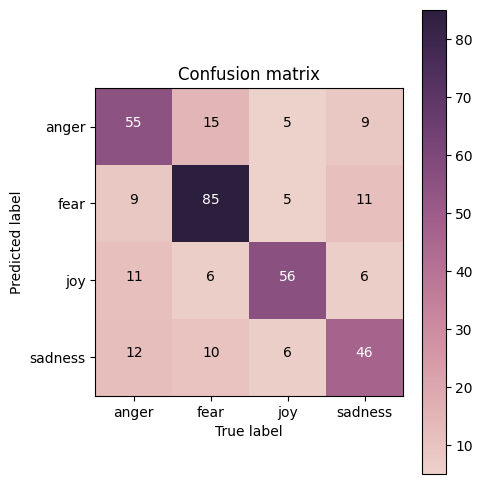

In [50]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
# X_count_TF = vectorizer.fit_transform(corpus)
clf.fit(X_train, y_train)

## predict!
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [51]:
# Answer here
# Naive Bayes model less training accuracy but get larger testing accuracy. Maybe the Decision Tree model is overfitted.
# Naive Bayes model get better performance while dealing with (True label:anger, Pred label:fear), it means that Naive Bayes model can distinguish anger and fear more than Decision Tree
# The difference of the result is because the Decision tree is a discriminative model while Naive bayes is a generative model.
# Generative model is more accurate and flexible while dealing whith label with relations (Ex. anger and fear is related emotions)

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [52]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [53]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\NTHUEECL\anaconda3\envs\DataMining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 1s 6ms/step - loss: 1.3234 - accuracy: 0.3659 - val_loss: 1.2777 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 0.9634 - accuracy: 0.6590 - val_loss: 0.9434 - val_accuracy: 0.6282
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.5616 - accuracy: 0.8024 - val_loss: 0.7983 - val_accuracy: 0.6974
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8530 - val_loss: 0.7994 - val_accuracy: 0.6715
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8887 - val_loss: 0.8518 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.9100 - val_loss: 0.8798 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2130 - accuracy: 0.9308 - val_loss: 0.8967 - val_accuracy: 0.6859
Epoch 8/25
113/11

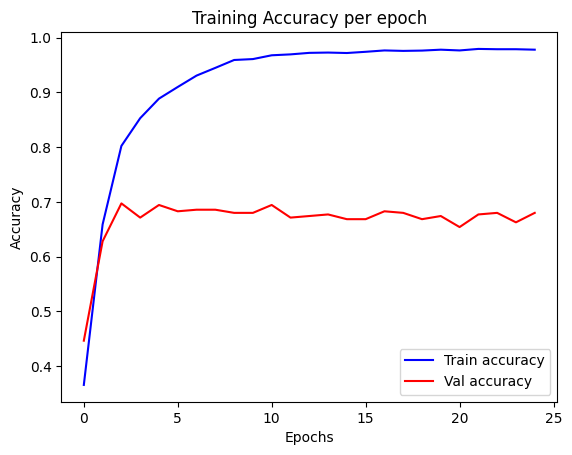

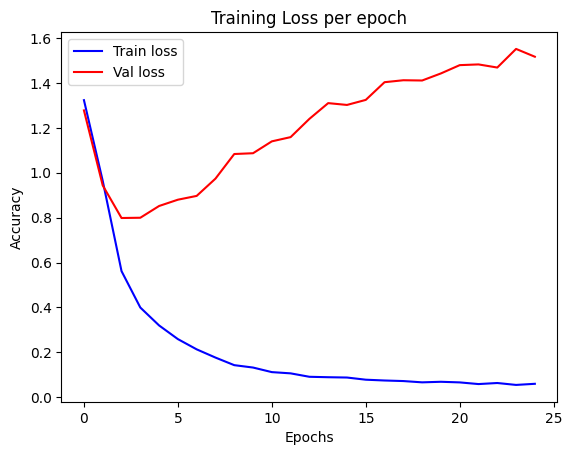

In [55]:
# Answer here
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

epoch = training_log['epoch']
tr_acc = training_log['accuracy']
tr_loss = training_log['loss']
val_acc = training_log['val_accuracy']
val_loss = training_log['val_loss']

plt.plot(epoch, tr_acc, label='Train accuracy', c='blue')
plt.plot(epoch, val_acc, label='Val accuracy', c='red')
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.clf()
plt.plot(epoch, tr_loss, label='Train loss', c='blue')
plt.plot(epoch ,val_loss, label='Val loss', c='red')
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [56]:
# Answer here
# We can use the doc2vec model wich is pretrained on the same model

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [57]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

C:\Users\NTHUEECL\anaconda3\envs\DataMining\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\NTHUEECL\anaconda3\envs\DataMining\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



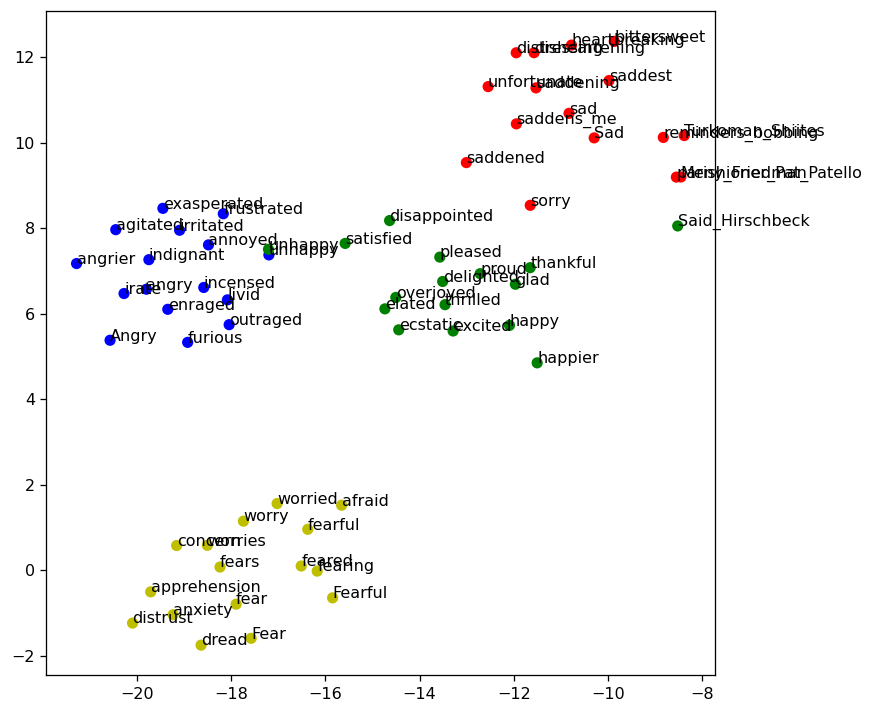

In [58]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


## 3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


### Below are the steps I used for the data preprocessing process

1. The json data is loaded into dataframe

In [ ]:
# data = pd.read_json("tweets_DM/tweets_DM.json", lines=True)

2. The algorithm reads the data frame and get the ['tweet'] column values, which is in dictionary type
3. The dictionary is turned into dataframe

In [ ]:
# ls_hash = []
# ls_text = []
# ls_tweet = []
# for index in range(data.shape[0]):
# # for index in range(10):
#     hashtag, tweet_id, text = list(data['_source'][index]['tweet'].values())[:]
#     ls_hash.append(hashtag)
#     ls_text.append(text)
#     ls_tweet.append(tweet_id)

# data['hashtag'] = ls_hash
# data['text'] = ls_text
# data['tweet'] = ls_tweet

4. The data frame is maped with the data indentification (tweet id) by pandas merge function

In [ ]:
# data = pd.merge(data, data_identification)

5. The data merged data is separated into training and testing data

In [ ]:
# data_train = data[data['identification']=='train']
# data_test = data[data['identification']=='test']

6. The trainging data is merge with emotion data

In [ ]:
# data_train = pd.merge(data_train, data_emotion)

### I tried two different model and vectorizer for the problem

1. The model from LAB, which uses the CountVectorizer as vectorizer and the max_feature was set to be 500  
Also, because the BOW has to fit all the training text data, taking too muck time. The BOW fitting is set to only use part of the training data  
The result of testing data submitted to Kaggle has only 0.39 in accuracy score. Therefore I increase accuracy by using pretrain model  
The model is trained using  (loss function : categorical_crossentropy, optimizer : Adam)  

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# import plotly.express as px
# import numpy as np
# import pandas as pd
# import nltk
# import keras

# train_df = pd.read_csv("Training_data.csv")
# test_df = pd.read_csv('Testing_data.csv')

# # count_vect = CountVectorizer()
# # X_counts = count_vect.fit_transform(train_df.text)

# BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# BOW_500.fit(train_df['text'][:500])
# train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# X_train = BOW_500.transform(train_df['text'])
# X_test = BOW_500.transform(test_df['text'])
# Y_train = train_df['emotion']

# print('*'*50)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(Y_train)

# def label_encode(le, labels):
#     enc = le.transform(labels)
#     return keras.utils.to_categorical(enc)

# def label_decode(le, one_hot_label):
#     dec = np.argmax(one_hot_label, axis=1)
#     return le.inverse_transform(dec)

# Y_train = label_encode(label_encoder, Y_train)

# import keras
# from keras.models import Model
# from keras.layers import Input, Dense
# from keras.layers import ReLU, Softmax

# input_shape = X_train.shape[1]
# output_shape = len(label_encoder.classes_)

# # input layer
# model_input = Input(shape=(input_shape, ))  # 500
# X = model_input

# # 1st hidden layer
# X_W1 = Dense(units=64)(X)  # 64
# H1 = ReLU()(X_W1)

# # 2nd hidden layer
# H1_W2 = Dense(units=64)(H1)  # 64
# H2 = ReLU()(H1_W2)

# # output layer
# H2_W3 = Dense(units=output_shape)(H2)  # 4
# H3 = Softmax()(H2_W3)

# model_output = H3

# # create model
# model = Model(inputs=[model_input], outputs=[model_output])

# # loss function & optimizer
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# from keras.callbacks import CSVLogger

# csv_logger = CSVLogger('logs/training_log.csv')

# # training setting
# epochs = 25
# batch_size = 32

# # training!
# history = model.fit(X_train, Y_train, 
#                     epochs=epochs, 
#                     batch_size=batch_size, 
#                     callbacks=[csv_logger],
#                     # validation_data = (X_test, Y_test))
# )

# print('training finish')

# pred_result = model.predict(X_test, batch_size=128)
# pred_result = label_decode(label_encoder, pred_result)

# np.save('result.npy',pred_result)
# model.save('TrainedModel')


2. Model with pretrained small_bert model from Tensorflow Hub  
The training Y data (emotion) is transformed by LabelEncoder and to_categorical (to one-hot encoding)  
The training X data (text) doesn't need to be manually trasform into vector since the BERT NN model has a first layer set to do the encoding process  
The BERT model with some following classification layers is been used as the training model  
The model is trained using  (loss function : categorical_crossentropy, optimizer : Adam)  

In [ ]:
# import tensorflow_text
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# import tensorflow_hub as hub
# from sklearn.preprocessing import LabelEncoder

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# train_df = pd.read_csv("Training_data.csv")
# test_df = pd.read_csv('Testing_data.csv')

# X_train = train_df['text']
# Y_train = train_df['emotion']

# X_test = test_df['text']


# label_encoder = LabelEncoder()
# label_encoder.fit(Y_train)

# class_num = (label_encoder.classes_).shape[0]

# print(class_num)

# def label_encode(le, labels):
#     enc = le.transform(labels)
#     return tf.keras.utils.to_categorical(enc)
    

# def label_decode(le, labels):
#     dec = np.argmax(labels, axis=1)
#     return le.inverse_transform(dec)

# Y_train = label_encode(label_encoder, Y_train)

# Y_train = pd.DataFrame(Y_train)
# print(Y_train.shape)



# test_ds = X_test


# bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

# map_name_to_handle = {'small_bert/bert_en_uncased_L-4_H-512_A-8':'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'}
# map_model_to_preprocess = {'small_bert/bert_en_uncased_L-4_H-512_A-8':'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'}
# tfhub_handle_encoder = map_name_to_handle[bert_model_name]
# tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

# bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)



# bert_model = hub.KerasLayer(tfhub_handle_encoder)

# def build_classifier_model():
#     text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
#     preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
#     encoder_inputs = preprocessing_layer(text_input)
#     encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
#     outputs = encoder(encoder_inputs)
#     net = outputs['pooled_output']
#     net = tf.keras.layers.Dropout(0.1)(net)
#     net = tf.keras.layers.Dense(class_num, activation='sigmoid', name='classifier')(net)
#     return tf.keras.Model(text_input, net)

# classifier_model = build_classifier_model()

# loss = tf.keras.losses.CategoricalCrossentropy()
# metrics = tf.metrics.CategoricalAccuracy()


# epochs = 10

# optimizer = tf.keras.optimizers.Adam()

# classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# history = classifier_model.fit(x=X_train,y= Y_train, epochs=epochs)

# pred_result = classifier_model.predict(x=X_test)

# print(pred_result)

# pred_result = label_decode(label_encoder, pred_result)

# np.save('result_bert.npy',pred_result)

# print(pred_result)

# print(pred_result.shape)

# classifier_model.save('BERT_model')

In [ ]:
# Below are the steps I used for the data preprocessing process
    #  1. The json data is loaded into dataframe
    #  2. The algorithm reads the data frame and get the ['tweet'] column values, which is in dictionary type
    #  3. The dictionary is turned into dataframe
    #  4. The data frame is maped with the data indentification (tweet id) by pandas merge function
    #  5. The data merged data is separated into training and testing data
    #  6. The trainging data is merge with emotion data


# I tried two model and also two vectorizer for the problem
    # 1. The model from LAB, which uses the CountVectorizer as vectorizer and the max_feature was set to be 500
        # Also, because the BOW has to fit all the training text data, taking too muck time. The BOW fitting is set to only use part of the training data
        # The result of testing data submitted to Kaggle has only 0.39 in accuracy score. Therefore I increase accuracy by using pretrain model
        # The model is trained using  (loss function : categorical_crossentropy, optimizer : Adam)
    # 2. Model with pretrained small_bert model from Tensorflow Hub
        # The training Y data (emotion) is transformed by LabelEncoder and to_categorical (to one-hot encoding)
        # The training X data (text) doesn't need to be manually trasform into vector since the BERT NN model has a first layer set to do the encoding process 
        # The BERT model with some following classification layers is been used as the training model
        # The model is trained using  (loss function : categorical_crossentropy, optimizer : Adam)